**Introduction to Artificial Neural Networks**

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/Users/abhinav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [3]:
y_pred

array([1])

/Users/abhinav/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


Saving figure perceptron_iris_plot


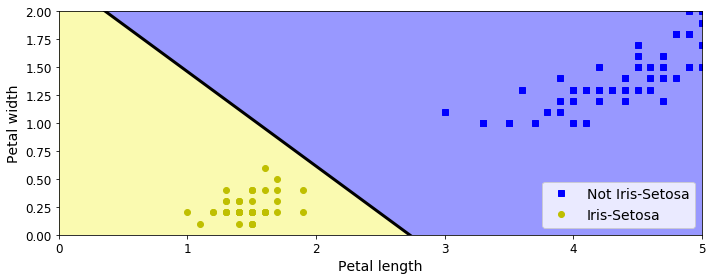

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


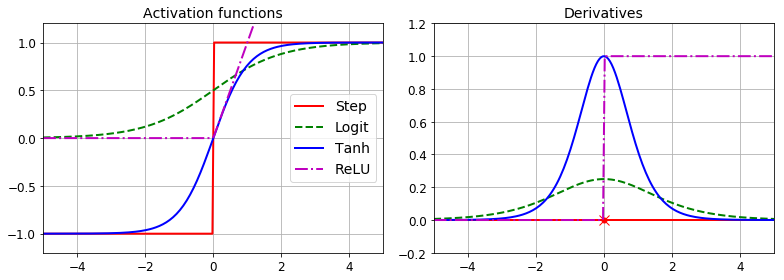

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

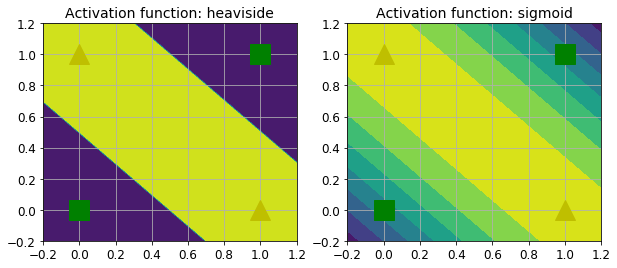

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## using tf.learn

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [11]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c281e2320>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/yp/1dcg5wd53nqdzc32249l1_kh0000gn/T/tmph0kr5rpg'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/yp/1dcg5wd53nqdzc32249l1_kh0000gn/T/tmph0kr5rpg/model.ckpt.
INFO:tensorflow:loss = 2.40058, step = 1
INFO:tensorflow:global_step/sec: 202.978
INFO:tensorflow:loss = 0.312676, step = 101 (0.496 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 224.577
INFO:tensorflow:loss = 0.0169789, step = 7401 (0.446 sec)
INFO:tensorflow:global_step/sec: 220.826
INFO:tensorflow:loss = 0.0107572, step = 7501 (0.453 sec)
INFO:tensorflow:global_step/sec: 221.583
INFO:tensorflow:loss = 0.0105873, step = 7601 (0.451 sec)
INFO:tensorflow:global_step/sec: 221.111
INFO:tensorflow:loss = 0.00593114, step = 7701 (0.452 sec)
INFO:tensorflow:global_step/sec: 223.712
INFO:tensorflow:loss = 0.00519743, step = 7801 (0.448 sec)
INFO:tensorflow:global_step/sec: 231.607
INFO:tensorflow:loss = 0.00644975, step = 7901 (0.435 sec)
INFO:tensorflow:global_step/sec: 217.298
INFO:tensorflow:loss = 0.00205743, step = 8001 (0.456 sec)
INFO:tensorflow:global_step/sec: 223.962
INFO:tensorflow:loss = 0.00661909, step = 8101 (0.445 sec)
INFO:tensorflow:global_step/sec: 214.918
INFO:tensorflow:loss = 0.0350034, step = 8201 (0.466 sec)
INFO:tensorflow:global_step/sec: 210.863
INFO:tensorflow:loss = 0.0255905, step = 8301 (0.476 sec)
INFO:

INFO:tensorflow:global_step/sec: 180.082
INFO:tensorflow:loss = 0.00358959, step = 15601 (0.555 sec)
INFO:tensorflow:global_step/sec: 158.852
INFO:tensorflow:loss = 0.00588915, step = 15701 (0.630 sec)
INFO:tensorflow:global_step/sec: 172.444
INFO:tensorflow:loss = 0.000818647, step = 15801 (0.581 sec)
INFO:tensorflow:global_step/sec: 167.888
INFO:tensorflow:loss = 0.000857814, step = 15901 (0.599 sec)
INFO:tensorflow:global_step/sec: 199.948
INFO:tensorflow:loss = 0.00651137, step = 16001 (0.494 sec)
INFO:tensorflow:global_step/sec: 217.812
INFO:tensorflow:loss = 0.00306222, step = 16101 (0.459 sec)
INFO:tensorflow:global_step/sec: 187.618
INFO:tensorflow:loss = 0.000188798, step = 16201 (0.532 sec)
INFO:tensorflow:global_step/sec: 190.392
INFO:tensorflow:loss = 0.00255336, step = 16301 (0.526 sec)
INFO:tensorflow:global_step/sec: 173.894
INFO:tensorflow:loss = 0.00117632, step = 16401 (0.577 sec)
INFO:tensorflow:global_step/sec: 177.863
INFO:tensorflow:loss = 0.00179281, step = 16501

INFO:tensorflow:global_step/sec: 226.962
INFO:tensorflow:loss = 0.000105218, step = 23701 (0.441 sec)
INFO:tensorflow:global_step/sec: 225.94
INFO:tensorflow:loss = 0.000919802, step = 23801 (0.442 sec)
INFO:tensorflow:global_step/sec: 229.171
INFO:tensorflow:loss = 0.00179801, step = 23901 (0.437 sec)
INFO:tensorflow:global_step/sec: 225.605
INFO:tensorflow:loss = 0.00146623, step = 24001 (0.443 sec)
INFO:tensorflow:global_step/sec: 229.394
INFO:tensorflow:loss = 0.000645721, step = 24101 (0.436 sec)
INFO:tensorflow:global_step/sec: 221.182
INFO:tensorflow:loss = 0.00170859, step = 24201 (0.452 sec)
INFO:tensorflow:global_step/sec: 219.287
INFO:tensorflow:loss = 0.000190123, step = 24301 (0.457 sec)
INFO:tensorflow:global_step/sec: 222.5
INFO:tensorflow:loss = 0.00181884, step = 24401 (0.449 sec)
INFO:tensorflow:global_step/sec: 224.082
INFO:tensorflow:loss = 0.00122267, step = 24501 (0.447 sec)
INFO:tensorflow:global_step/sec: 235.808
INFO:tensorflow:loss = 0.000729735, step = 24601 

INFO:tensorflow:global_step/sec: 204.912
INFO:tensorflow:loss = 0.000169163, step = 31801 (0.488 sec)
INFO:tensorflow:global_step/sec: 218.668
INFO:tensorflow:loss = 0.00069206, step = 31901 (0.457 sec)
INFO:tensorflow:global_step/sec: 189.047
INFO:tensorflow:loss = 0.000129269, step = 32001 (0.529 sec)
INFO:tensorflow:global_step/sec: 219.359
INFO:tensorflow:loss = 0.000392807, step = 32101 (0.457 sec)
INFO:tensorflow:global_step/sec: 229.629
INFO:tensorflow:loss = 0.00115589, step = 32201 (0.435 sec)
INFO:tensorflow:global_step/sec: 222.21
INFO:tensorflow:loss = 0.00056562, step = 32301 (0.450 sec)
INFO:tensorflow:global_step/sec: 222.92
INFO:tensorflow:loss = 0.000176759, step = 32401 (0.449 sec)
INFO:tensorflow:global_step/sec: 225.941
INFO:tensorflow:loss = 0.00040774, step = 32501 (0.442 sec)
INFO:tensorflow:global_step/sec: 229.307
INFO:tensorflow:loss = 0.00021994, step = 32601 (0.437 sec)
INFO:tensorflow:global_step/sec: 222.359
INFO:tensorflow:loss = 0.000797875, step = 32701

INFO:tensorflow:global_step/sec: 223.133
INFO:tensorflow:loss = 0.000799873, step = 39901 (0.448 sec)
INFO:tensorflow:Saving checkpoints for 40000 into /var/folders/yp/1dcg5wd53nqdzc32249l1_kh0000gn/T/tmph0kr5rpg/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00044029.


SKCompat()

In [12]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from /var/folders/yp/1dcg5wd53nqdzc32249l1_kh0000gn/T/tmph0kr5rpg/model.ckpt-40000


0.98350000000000004

In [13]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.071474514666464845

## Using plain TensorFlow

In [14]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [15]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [16]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [17]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [18]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [19]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [20]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [21]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [22]:
n_epochs = 40
batch_size = 50

In [23]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "model_ckps/my_model_final.ckpt")

0 Train accuracy: 0.9 Val accuracy: 0.9146
1 Train accuracy: 0.94 Val accuracy: 0.9348
2 Train accuracy: 0.92 Val accuracy: 0.9466
3 Train accuracy: 0.96 Val accuracy: 0.9508
4 Train accuracy: 0.92 Val accuracy: 0.9586
5 Train accuracy: 0.94 Val accuracy: 0.9584
6 Train accuracy: 0.98 Val accuracy: 0.9608
7 Train accuracy: 0.96 Val accuracy: 0.9636
8 Train accuracy: 0.92 Val accuracy: 0.9638
9 Train accuracy: 0.96 Val accuracy: 0.965
10 Train accuracy: 0.98 Val accuracy: 0.9686
11 Train accuracy: 0.94 Val accuracy: 0.9686
12 Train accuracy: 1.0 Val accuracy: 0.9702
13 Train accuracy: 0.94 Val accuracy: 0.9686
14 Train accuracy: 1.0 Val accuracy: 0.9716
15 Train accuracy: 1.0 Val accuracy: 0.973
16 Train accuracy: 1.0 Val accuracy: 0.9736
17 Train accuracy: 0.98 Val accuracy: 0.9736
18 Train accuracy: 1.0 Val accuracy: 0.9752
19 Train accuracy: 1.0 Val accuracy: 0.975
20 Train accuracy: 0.98 Val accuracy: 0.9748
21 Train accuracy: 1.0 Val accuracy: 0.975
22 Train accuracy: 1.0 Val accur

In [24]:
with tf.Session() as sess:
    saver.restore(sess, "model_ckps/my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from model_ckps/my_model_final.ckpt


In [25]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [26]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [27]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: the book uses `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [28]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [29]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [30]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [31]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [32]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [33]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [34]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [35]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "model_ckps/my_model_final.ckpt")

0 Train accuracy: 0.9 Test accuracy: 0.9053
1 Train accuracy: 0.88 Test accuracy: 0.9206
2 Train accuracy: 0.94 Test accuracy: 0.9301
3 Train accuracy: 0.94 Test accuracy: 0.9397
4 Train accuracy: 0.92 Test accuracy: 0.945
5 Train accuracy: 0.94 Test accuracy: 0.9476
6 Train accuracy: 0.92 Test accuracy: 0.9514
7 Train accuracy: 0.98 Test accuracy: 0.9547
8 Train accuracy: 0.96 Test accuracy: 0.9569
9 Train accuracy: 0.94 Test accuracy: 0.9605
10 Train accuracy: 0.92 Test accuracy: 0.962
11 Train accuracy: 0.96 Test accuracy: 0.9631
12 Train accuracy: 1.0 Test accuracy: 0.966
13 Train accuracy: 0.94 Test accuracy: 0.9656
14 Train accuracy: 1.0 Test accuracy: 0.967
15 Train accuracy: 0.94 Test accuracy: 0.9682
16 Train accuracy: 0.96 Test accuracy: 0.97
17 Train accuracy: 0.98 Test accuracy: 0.9695
18 Train accuracy: 1.0 Test accuracy: 0.97
19 Train accuracy: 1.0 Test accuracy: 0.9708


In [36]:
show_graph(tf.get_default_graph())